# **Task 1:**

Build a simple image classification model using a popular dataset (e.g., CIFAR-10) and a deep learning framework (e.g., TensorFlow or PyTorch). Train the model, evaluate its performance, and experiment with different hyperparameters to improve accuracy.

In [1]:
import kagglehub

path = kagglehub.dataset_download("ayush1220/cifar10")

print("Path to dataset files:", path)

100%|██████████| 139M/139M [00:07<00:00, 19.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ayush1220/cifar10/versions/2


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import os

cifar10_path = os.path.join(path, 'cifar10')
print("Contents of 'cifar10' folder:")
print(os.listdir(cifar10_path))


Contents of 'cifar10' folder:
['test', 'train']


In [4]:
train_dir = os.path.join(cifar10_path, 'train')
test_dir = os.path.join(cifar10_path, 'test')


Load Model

In [5]:
import tensorflow as tf

img_size = (32, 32)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'  # use 'categorical' if one-hot encoding is needed
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)


Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


Optimize Performance with Prefetching

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


CNN Model

In [11]:
model = models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])


Compile the Model

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [13]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[callback])


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.2887 - loss: 2.1211 - val_accuracy: 0.4932 - val_loss: 1.4052
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4778 - loss: 1.4198 - val_accuracy: 0.6098 - val_loss: 1.0928
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5934 - loss: 1.1600 - val_accuracy: 0.5362 - val_loss: 1.5617
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6524 - loss: 1.0029 - val_accuracy: 0.7102 - val_loss: 0.8427
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6840 - loss: 0.9167 - val_accuracy: 0.7267 - val_loss: 0.8332
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7110 - loss: 0.8406 - val_accuracy: 0.7341 - val_loss: 0.7618
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7288 - loss: 0.7849 - val_accuracy: 0.7645 - val_loss: 0.7032
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7485 - loss: 

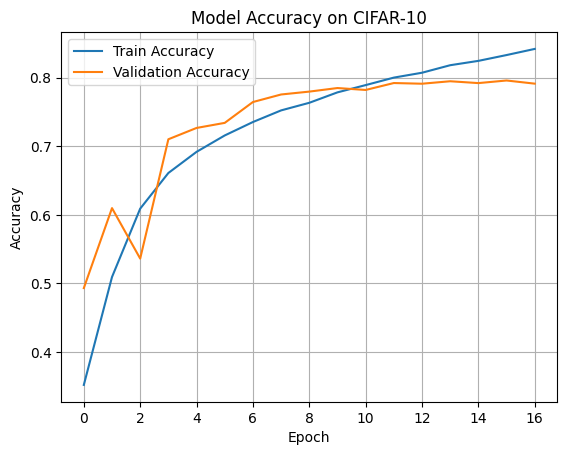

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on CIFAR-10')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7955 - loss: 0.6333
Test accuracy: 0.7948


In [21]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "best_model.keras", save_best_only=True, monitor='val_loss', mode='min'
)

